1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

+а) зависимость цены на недвижимость в конкретном регионе от времени,

+б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

-в) количество отказов компьютера,

+г) число обращений в поликлинику по району,

-д) координаты автобуса при движении по маршруту,

-е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

2. вариант 1) Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
print(os.listdir())

['.ipynb_checkpoints', 'covid_19_data.csv', 'DOM_hourly.csv', 'DUQ_hourly.csv', 'Kantorovich', 'l1_homrwork.ipynb', 'PJME_hourly.csv', 'Анализ COVID 19.ipynb', 'Временные ряды 1.html', 'Временные ряды 1.ipynb', 'нефть-brent 2010-2019.xlsx']


In [4]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [6]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [9]:
data.count

<bound method DataFrame.count of                      DUQ_MW
Datetime                   
2005-12-31 01:00:00  1458.0
2005-12-31 02:00:00  1377.0
2005-12-31 03:00:00  1351.0
2005-12-31 04:00:00  1336.0
2005-12-31 05:00:00  1356.0
...                     ...
2018-01-01 20:00:00  1962.0
2018-01-01 21:00:00  1940.0
2018-01-01 22:00:00  1891.0
2018-01-01 23:00:00  1820.0
2018-01-02 00:00:00  1721.0

[119068 rows x 1 columns]>

In [11]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


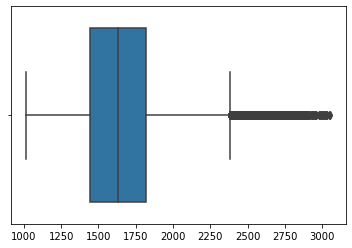

In [13]:
sns.boxplot(data.values);

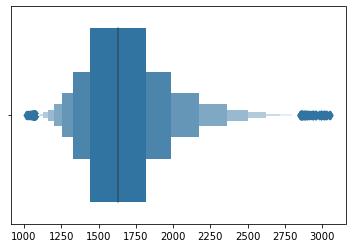

In [15]:
sns.boxenplot(data.values);

In [20]:
data['DUQ_MW'].isnull().sum()

0

пропусков нет

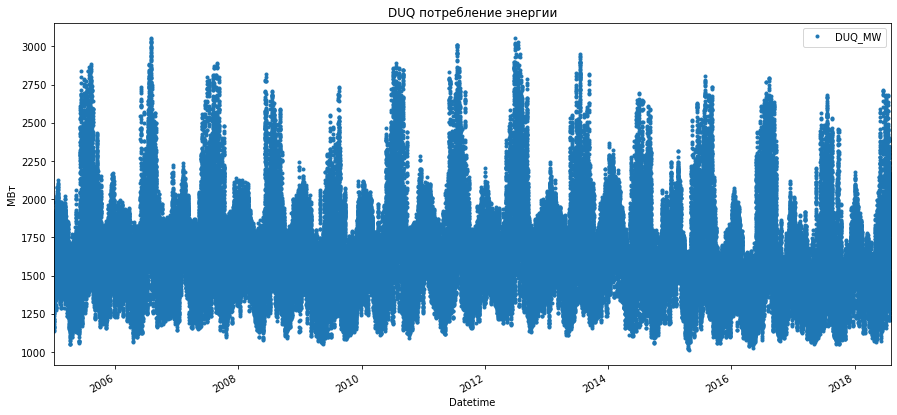

In [19]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' );

данные цикличны, визуально без выбросов


2. вариант2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).

In [29]:
COVID_ = pd.read_csv('covid_19_data.csv')
COVID_.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [30]:
COVID_.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
13204,13205,04/08/2020,Wyoming,US,2020-04-08 22:59:00,221.0,0.0,0.0
13205,13206,04/08/2020,Xinjiang,Mainland China,2020-04-08 22:59:00,76.0,3.0,73.0
13206,13207,04/08/2020,Yukon,Canada,2020-04-08 22:59:00,7.0,0.0,0.0
13207,13208,04/08/2020,Yunnan,Mainland China,2020-04-08 22:59:00,184.0,2.0,173.0
13208,13209,04/08/2020,Zhejiang,Mainland China,2020-04-08 22:59:00,1266.0,1.0,1232.0


In [31]:
COVID_['Data']= pd.to_datetime(COVID_['ObservationDate']).dt.date
COVID = COVID_.copy()

In [32]:
COVID = COVID.groupby(['Data','Country/Region'])['Confirmed','Deaths','Recovered'].sum()
COVID.head()

Confirmed  Deaths  Recovered
Data       Country/Region                              
2020-01-22 Hong Kong             0.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 1.0     0.0        0.0
           Mainland China      547.0    17.0       28.0
           South Korea           1.0     0.0        0.0

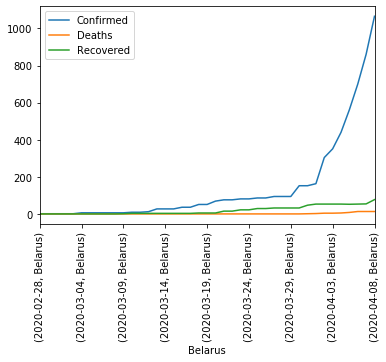

In [48]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Belarus', ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)
plt.xlabel('Belarus')
plt.show()

In [35]:
COVID_all = COVID.groupby(['Data'])['Confirmed','Deaths','Recovered'].sum()
COVID_all.tail()

,Confirmed,Deaths,Recovered
Data,,,
2020-04-04,1197405.0,64606.0,246152.0
2020-04-05,1272115.0,69374.0,260012.0
2020-04-06,1345101.0,74565.0,276515.0
2020-04-07,1426096.0,81865.0,300054.0
2020-04-08,1511104.0,88338.0,328661.0


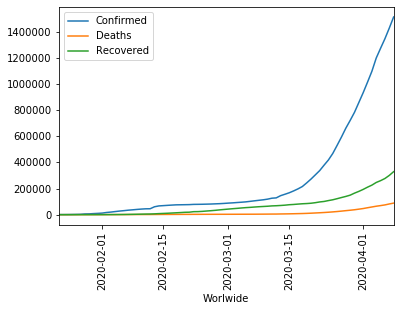

In [46]:
COVID_all.plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)
plt.xlabel('Worlwide')
plt.show()

3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )
3. вариант 2) Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.